#PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [1]:
!pip install scikeras

In [2]:
!pip install tensorflow

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,KFold
from imblearn.over_sampling import SMOTE
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import Dense,Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop

In [4]:
from google.colab import files
uploaded=files.upload()

Saving forestfires (1).csv to forestfires (1).csv


In [5]:
data=pd.read_csv('forestfires (1).csv')
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


In [10]:

data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [11]:
data.drop('month',axis=1,inplace=True)
data.drop('day',axis=1,inplace=True)

In [12]:
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [13]:
import plotly.express as px
px.bar(x=data['size_category'])

In [14]:
data.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

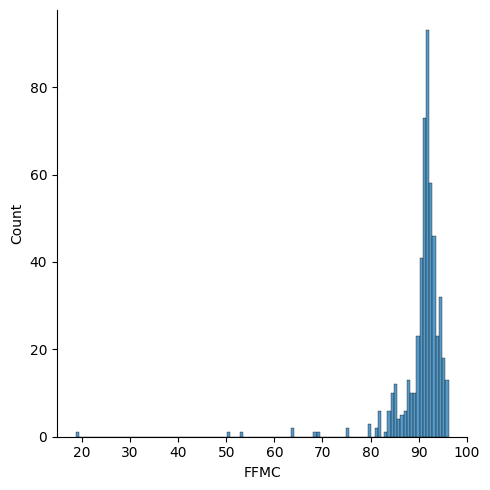

<Figure size 640x480 with 0 Axes>

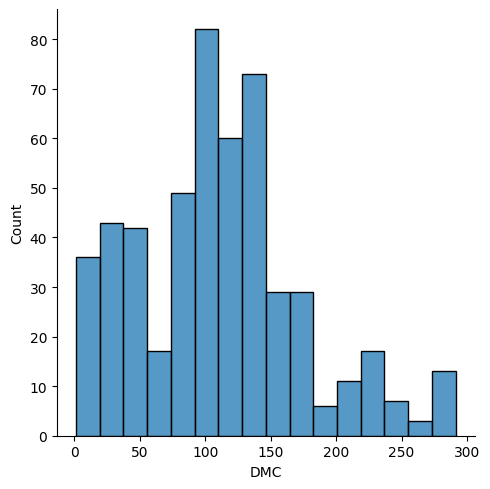

<Figure size 640x480 with 0 Axes>

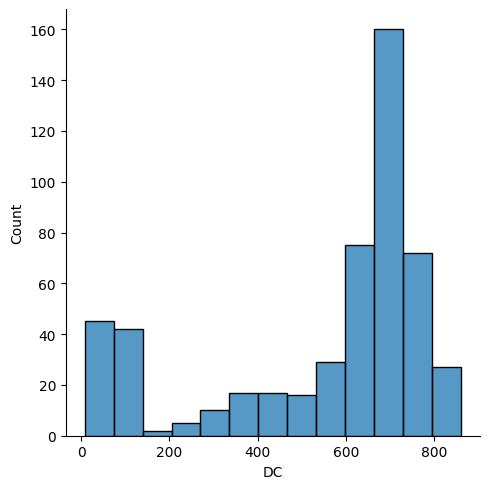

<Figure size 640x480 with 0 Axes>

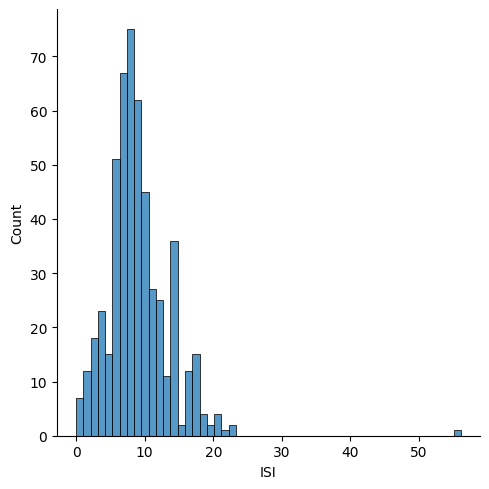

<Figure size 640x480 with 0 Axes>

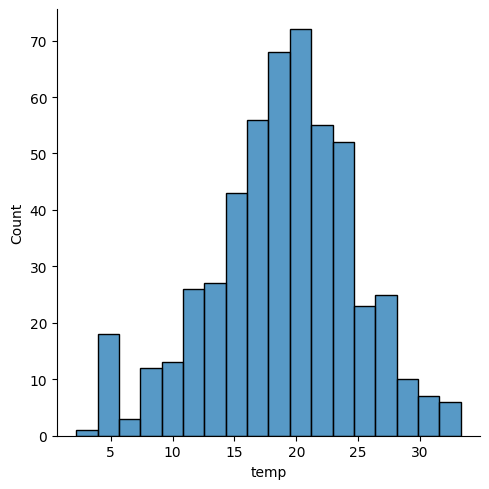

<Figure size 640x480 with 0 Axes>

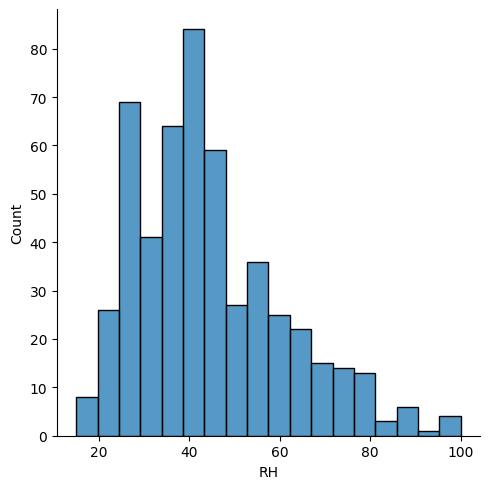

<Figure size 640x480 with 0 Axes>

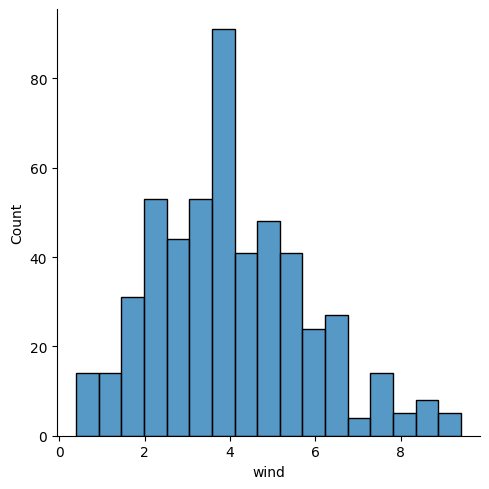

<Figure size 640x480 with 0 Axes>

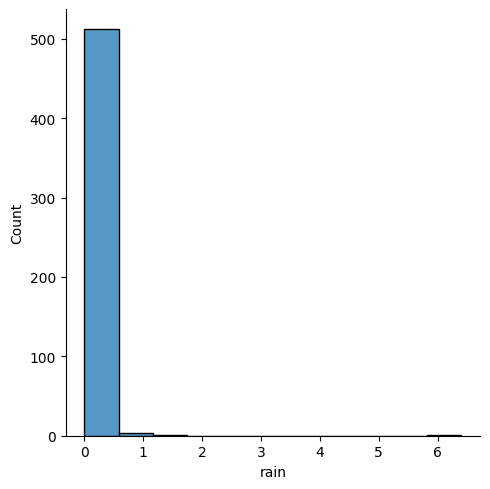

<Figure size 640x480 with 0 Axes>

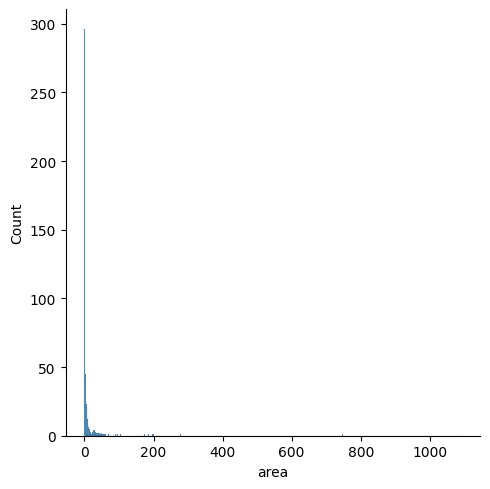

In [15]:
columns=(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'])
for i in columns:
  plt.figure()
  sns.displot(data[i])

In [16]:
fig=px.strip(data,x='size_category',y='temp',color='size_category')
fig.show()

In [17]:
fig=px.pie(data,values='rain',names='temp',hover_data=['size_category','rain'])
fig.show()

In [18]:
le=LabelEncoder()
data['size_category']=le.fit_transform(data['size_category'])
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
corr=data.corr()
corr

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609,-0.022063
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907,-0.034715
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857,-0.019428
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877,0.008726
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006,-0.006021
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596,0.045243
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476,-0.059113
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733,-0.050001
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573,-0.311322
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671,0.021810


<function matplotlib.pyplot.show(close=None, block=None)>

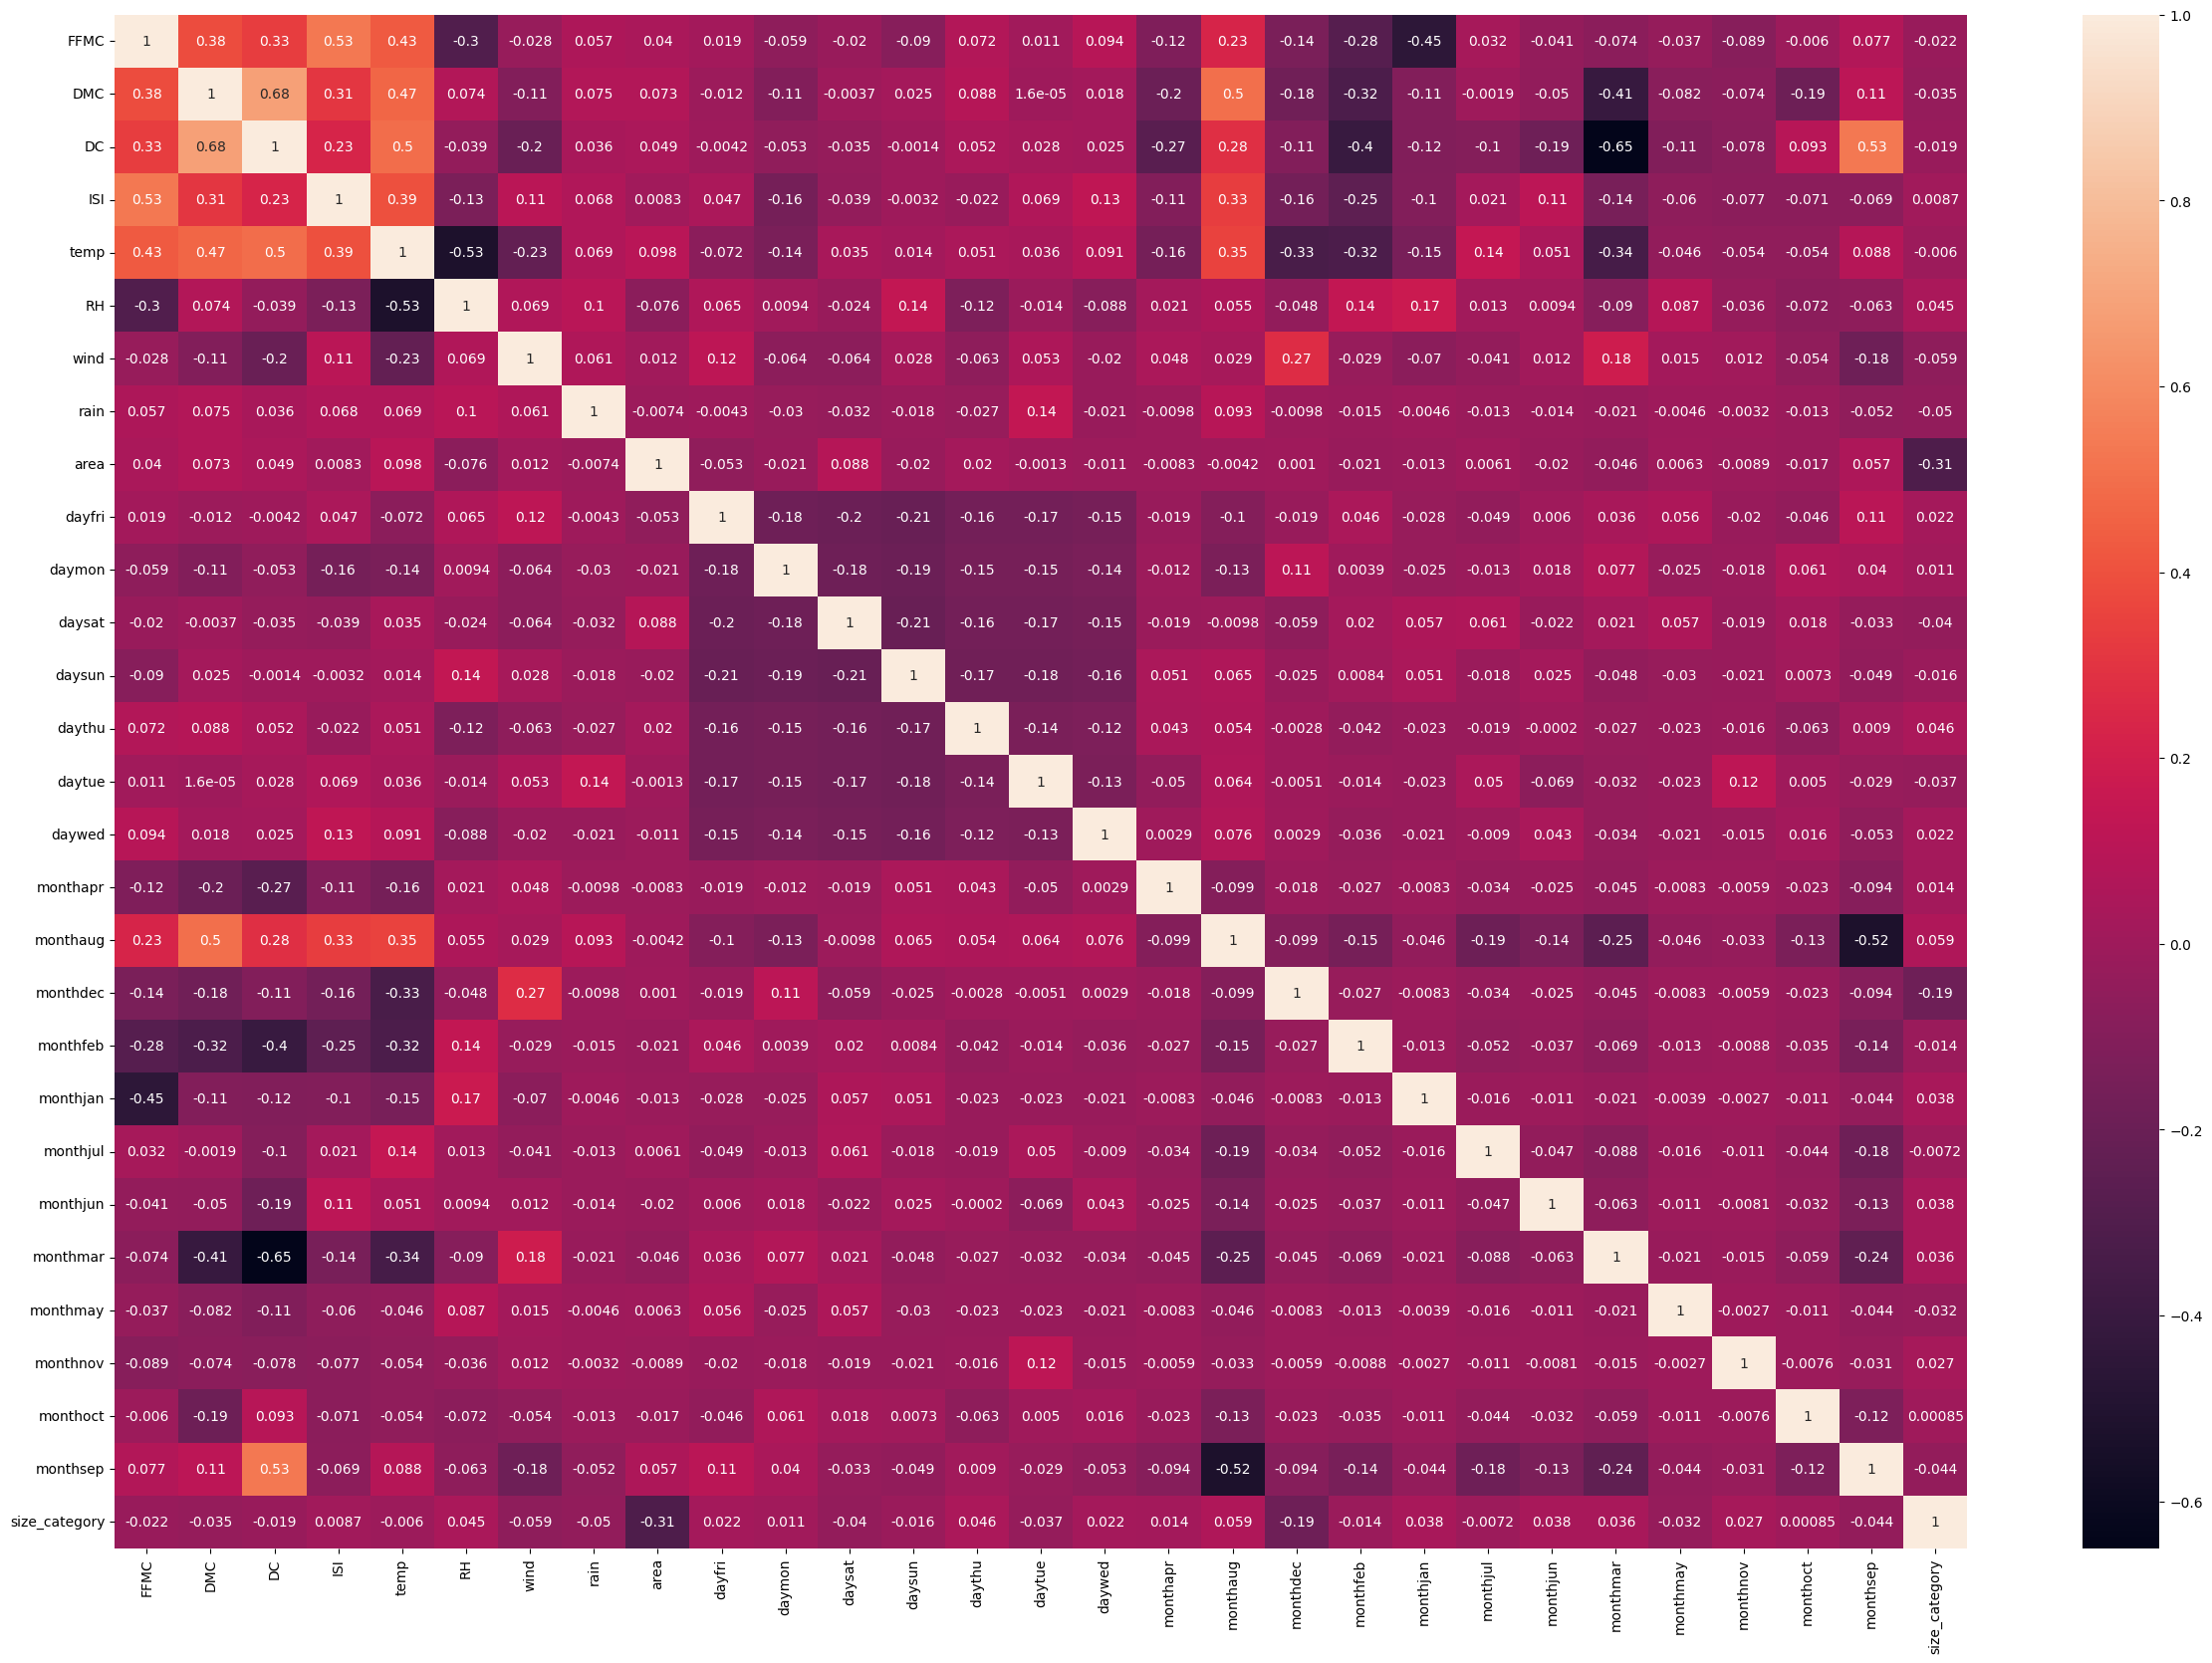

In [20]:
plt.figure(figsize=(30,20))
sns.heatmap(corr,annot=True)
plt.show

In [21]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [23]:
from imblearn.over_sampling import SMOTE
model=SMOTE(random_state=25)
x_train_st,y_train_st=model.fit_resample(x_train,np.array(y_train).ravel())
x_train_st,y_train_st

(          FFMC         DMC          DC        ISI       temp  RH      wind  \
 0    96.100000  181.100000  671.200000  14.300000  20.700000  69  4.900000   
 1    90.300000  290.000000  855.300000   7.400000  16.200000  58  3.600000   
 2    92.300000   96.200000  450.200000  12.100000  23.400000  31  5.400000   
 3    91.600000  248.400000  753.800000   6.300000  20.400000  56  2.200000   
 4    94.300000   85.100000  692.300000  15.900000  25.900000  24  4.000000   
 ..         ...         ...         ...        ...        ...  ..       ...   
 601  92.714139  100.690461  512.279371  12.008176  26.971209  35  2.626916   
 602  89.194651   91.101024  708.063885   8.018058  13.203301  70  6.153945   
 603  93.500000  149.300000  728.600000   8.100000  25.350632  33  4.083123   
 604  95.304298  182.962666  664.816301  13.124531  30.876726  30  2.935094   
 605  90.353106  268.858605  808.385947   6.545468  24.994501  36  4.084369   
 
      rain       area  dayfri  ...  monthdec  mont

In [24]:
x_train=x_train_st.copy()
y_train=y_train_st.copy()

In [25]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(x_train)
X_train

array([[0.99870968, 0.62026189, 0.77788202, ..., 0.        , 0.        ,
        0.        ],
       [0.92387097, 0.99552033, 0.99378445, ..., 0.        , 0.        ,
        1.        ],
       [0.94967742, 0.32770503, 0.51870529, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.96516129, 0.51068229, 0.84519761, ..., 0.        , 0.        ,
        1.        ],
       [0.98844256, 0.62668045, 0.77039557, ..., 0.        , 0.        ,
        0.        ],
       [0.92455621, 0.92266921, 0.93876621, ..., 0.        , 0.        ,
        0.        ]])

In [26]:
X_test=scaler.fit_transform(x_test)
x_test

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
479,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53,0,...,0,0,0,1,0,0,0,0,0,0
471,89.6,25.4,73.7,5.7,18.0,40,4.0,0.0,38.48,1,...,0,0,0,0,0,0,1,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
501,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0.00,0,...,0,0,0,0,0,0,0,0,0,0
19,86.3,27.4,97.1,5.1,9.3,44,4.5,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,91.2,48.3,97.8,12.5,14.6,26,9.4,0.0,2.53,1,...,0,0,0,0,0,1,0,0,0,0
183,91.7,48.5,696.1,11.1,16.8,45,4.5,0.0,6.83,0,...,0,0,0,0,0,0,0,0,1,0
377,93.7,231.1,715.1,8.4,21.9,42,2.2,0.0,174.63,0,...,0,0,0,0,0,0,0,0,0,0
277,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,10.73,0,...,1,0,0,0,0,0,0,0,0,0


In [27]:
def create_model():
  model=Sequential()
  model.add(Dense(12,input_dim=28,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  adam=Adam(lr=0.01)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')
  return model

In [28]:
from sklearn.model_selection import GridSearchCV
model=KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20,30]
epochs=[50,100,150]
param_grid=dict(batch_size=batch_size,epochs=epochs)
gsv=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result=gsv.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[CV 1/5] END ..........batch_size=10, epochs=50;, score=0.844 total time=  11.5s


[CV 2/5] END ..........batch_size=10, epochs=50;, score=0.843 total time=   6.2s


[CV 3/5] END ..........batch_size=10, epochs=50;, score=0.876 total time=   6.5s


[CV 4/5] END ..........batch_size=10, epochs=50;, score=0.893 total time=   6.0s


[CV 5/5] END ..........batch_size=10, epochs=50;, score=0.926 total time=   6.1s


[CV 1/5] END .........batch_size=10, epochs=100;, score=0.902 total time=  11.2s


[CV 2/5] END .........batch_size=10, epochs=100;, score=0.942 total time=  11.3s


[CV 3/5] END .........batch_size=10, epochs=100;, score=0.967 total time=  11.3s


[CV 4/5] END .........batch_size=10, epochs=100;, score=0.967 total time=  11.3s


[CV 5/5] END .........batch_size=10, epochs=100;, score=0.959 total time=  11.4s


[CV 1/5] END .........batch_size=10, epochs=150;, score=0.934 total time=  21.5s


[CV 2/5] END .........batch_size=10, epochs=150;, score=0.917 total time=  21.5s


[CV 3/5] END .........batch_size=10, epochs=150;, score=0.959 total time=  14.4s


[CV 4/5] END .........batch_size=10, epochs=150;, score=0.967 total time=  21.5s


[CV 5/5] END .........batch_size=10, epochs=150;, score=0.975 total time=  14.3s


[CV 1/5] END ..........batch_size=20, epochs=50;, score=0.795 total time=   3.6s


[CV 2/5] END ..........batch_size=20, epochs=50;, score=0.810 total time=   4.2s


[CV 3/5] END ..........batch_size=20, epochs=50;, score=0.835 total time=   3.6s


[CV 4/5] END ..........batch_size=20, epochs=50;, score=0.884 total time=   3.2s


[CV 5/5] END ..........batch_size=20, epochs=50;, score=0.926 total time=   5.8s


[CV 1/5] END .........batch_size=20, epochs=100;, score=0.893 total time=   6.2s


[CV 2/5] END .........batch_size=20, epochs=100;, score=0.893 total time=  11.3s


[CV 3/5] END .........batch_size=20, epochs=100;, score=0.884 total time=   6.2s


[CV 4/5] END .........batch_size=20, epochs=100;, score=0.942 total time=   5.6s


[CV 5/5] END .........batch_size=20, epochs=100;, score=0.942 total time=   5.8s


[CV 1/5] END .........batch_size=20, epochs=150;, score=0.918 total time=   8.2s


[CV 2/5] END .........batch_size=20, epochs=150;, score=0.917 total time=  11.3s


[CV 3/5] END .........batch_size=20, epochs=150;, score=0.967 total time=  11.3s


[CV 4/5] END .........batch_size=20, epochs=150;, score=0.950 total time=   8.5s


[CV 5/5] END .........batch_size=20, epochs=150;, score=0.959 total time=  11.4s


[CV 1/5] END ..........batch_size=30, epochs=50;, score=0.795 total time=   3.9s


[CV 2/5] END ..........batch_size=30, epochs=50;, score=0.752 total time=   2.6s


[CV 3/5] END ..........batch_size=30, epochs=50;, score=0.793 total time=   3.6s


[CV 4/5] END ..........batch_size=30, epochs=50;, score=0.851 total time=   3.5s


[CV 5/5] END ..........batch_size=30, epochs=50;, score=0.860 total time=   3.6s


[CV 1/5] END .........batch_size=30, epochs=100;, score=0.836 total time=   4.1s


[CV 2/5] END .........batch_size=30, epochs=100;, score=0.851 total time=   5.0s


[CV 3/5] END .........batch_size=30, epochs=100;, score=0.868 total time=   6.2s


[CV 4/5] END .........batch_size=30, epochs=100;, score=0.893 total time=   5.6s


[CV 5/5] END .........batch_size=30, epochs=100;, score=0.942 total time=   6.5s


[CV 1/5] END .........batch_size=30, epochs=150;, score=0.861 total time=   7.2s


[CV 2/5] END .........batch_size=30, epochs=150;, score=0.893 total time=   6.0s


[CV 3/5] END .........batch_size=30, epochs=150;, score=0.893 total time=  11.2s


[CV 4/5] END .........batch_size=30, epochs=150;, score=0.950 total time=   6.1s


[CV 5/5] END .........batch_size=30, epochs=150;, score=0.942 total time=  11.7s


In [29]:
print(result.best_score_,result.best_params_)

0.950521609538003 {'batch_size': 10, 'epochs': 150}


In [30]:
def create_model(learning_rate,dropout_rate):
  model=Sequential()
  model.add(Dense(12,input_dim=28,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(8,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  adam=Adam(lr=learning_rate)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')
  return model

In [31]:
model1=KerasClassifier(build_fn=create_model,batch_size=10,epochs=50,verbose=0,learning_rate=[0.01,0.001,0.1],
dropout_rate=[0.2,0.1,0.02])
#learning_rate=[0.01,0.001,0.1]
#dropout_rate=[0.2,0.1,0.02]
param_grid=dict(learning_rate=[0.01,0.001,0.1],dropout_rate=[0.2,0.1,0.02])
result=GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=5)
result1=result.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[CV 1/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.877 total time=   6.2s


[CV 2/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.843 total time=   6.1s


[CV 3/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.868 total time=   6.1s


[CV 4/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.901 total time=   6.1s


[CV 5/5] END dropout_rate=0.2, learning_rate=0.01;, score=0.959 total time=   5.2s


[CV 1/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.852 total time=   6.2s


[CV 2/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.868 total time=   5.3s


[CV 3/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.884 total time=   6.3s


[CV 4/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.934 total time=   6.4s


[CV 5/5] END dropout_rate=0.2, learning_rate=0.001;, score=0.926 total time=   6.2s


[CV 1/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.852 total time=   6.3s


[CV 2/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.876 total time=   6.0s


[CV 3/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.884 total time=   6.4s


[CV 4/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.901 total time=   5.9s


[CV 5/5] END dropout_rate=0.2, learning_rate=0.1;, score=0.934 total time=   6.9s


[CV 1/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.877 total time=   6.7s


[CV 2/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.860 total time=   6.3s


[CV 3/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.876 total time=  11.3s


[CV 4/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.893 total time=   6.0s


[CV 5/5] END dropout_rate=0.1, learning_rate=0.01;, score=0.917 total time=   6.0s


[CV 1/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.836 total time=   5.5s


[CV 2/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.860 total time=   6.4s


[CV 3/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.876 total time=   5.4s


[CV 4/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.950 total time=  11.4s


[CV 5/5] END dropout_rate=0.1, learning_rate=0.001;, score=0.942 total time=  11.3s


[CV 1/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.828 total time=   6.5s


[CV 2/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.851 total time=   5.3s


[CV 3/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.876 total time=   6.2s


[CV 4/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.926 total time=   5.5s


[CV 5/5] END dropout_rate=0.1, learning_rate=0.1;, score=0.942 total time=   6.2s


[CV 1/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.869 total time=   5.6s


[CV 2/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.860 total time=   6.2s


[CV 3/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.868 total time=   5.9s


[CV 4/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.893 total time=   6.2s


[CV 5/5] END dropout_rate=0.02, learning_rate=0.01;, score=0.950 total time=   6.6s


[CV 1/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.844 total time=   6.2s


[CV 2/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.860 total time=   6.5s


[CV 3/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.876 total time=   7.1s


[CV 4/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.901 total time=   6.2s


[CV 5/5] END dropout_rate=0.02, learning_rate=0.001;, score=0.926 total time=   7.7s


[CV 1/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.869 total time=   6.2s


[CV 2/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.868 total time=  11.3s


[CV 3/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.884 total time=   6.5s


[CV 4/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.917 total time=   5.6s


[CV 5/5] END dropout_rate=0.02, learning_rate=0.1;, score=0.942 total time=   6.1s


In [32]:
print(result1.best_params_,result1.best_score_)

{'dropout_rate': 0.02, 'learning_rate': 0.1} 0.8960845413900556


#Tunning of Hyperparameter:
#Active Function and Kernal Intializer

In [33]:
def create_model(activation_Function,init):
  model=Sequential()
  model.add(Dense(12,input_dim=28,kernel_initializer=init,activation=activation_Function))
  model.add(Dropout(0.2))
  model.add(Dense(8,kernel_initializer=init,activation=activation_Function))
  model.add(Dropout(0.2))
  model.add(Dense(1,kernel_initializer=init,activation='sigmoid'))
  adam=Adam(lr=0.01)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')
  return model

In [34]:
model=KerasClassifier(build_fn=create_model,batch_size=10,epochs=50,verbose=0,activation_Function=['relu','tanh','softmax','linear'],
init=['zero','uniform','normal'])
param_grid=dict(activation_Function=['relu','tanh','softmax','linear'],init=['zero','uniform','normal'])
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result=grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[CV 1/5] END activation_Function=relu, init=zero;, score=0.254 total time=   6.3s


[CV 2/5] END activation_Function=relu, init=zero;, score=0.281 total time=   6.3s


[CV 3/5] END activation_Function=relu, init=zero;, score=0.264 total time=   5.7s


[CV 4/5] END activation_Function=relu, init=zero;, score=0.298 total time=   5.5s


[CV 5/5] END activation_Function=relu, init=zero;, score=0.000 total time=   6.2s


[CV 1/5] END activation_Function=relu, init=uniform;, score=0.869 total time=   5.7s


[CV 2/5] END activation_Function=relu, init=uniform;, score=0.868 total time=   6.2s


[CV 3/5] END activation_Function=relu, init=uniform;, score=0.884 total time=   5.9s


[CV 4/5] END activation_Function=relu, init=uniform;, score=0.934 total time=   6.2s


[CV 5/5] END activation_Function=relu, init=uniform;, score=0.950 total time=   6.1s


[CV 1/5] END activation_Function=relu, init=normal;, score=0.844 total time=   6.2s


[CV 2/5] END activation_Function=relu, init=normal;, score=0.860 total time=   6.4s


[CV 3/5] END activation_Function=relu, init=normal;, score=0.868 total time=   6.1s


[CV 4/5] END activation_Function=relu, init=normal;, score=0.876 total time=   6.1s


[CV 5/5] END activation_Function=relu, init=normal;, score=0.942 total time=   5.3s


[CV 1/5] END activation_Function=tanh, init=zero;, score=0.254 total time=   6.2s


[CV 2/5] END activation_Function=tanh, init=zero;, score=0.281 total time=   5.2s


[CV 3/5] END activation_Function=tanh, init=zero;, score=0.264 total time=   6.2s


[CV 4/5] END activation_Function=tanh, init=zero;, score=0.298 total time=   6.1s


[CV 5/5] END activation_Function=tanh, init=zero;, score=0.000 total time=   6.2s


[CV 1/5] END activation_Function=tanh, init=uniform;, score=0.902 total time=   6.1s


[CV 2/5] END activation_Function=tanh, init=uniform;, score=0.909 total time=   5.8s


[CV 3/5] END activation_Function=tanh, init=uniform;, score=0.909 total time=   5.4s


[CV 4/5] END activation_Function=tanh, init=uniform;, score=0.926 total time=   7.3s


[CV 5/5] END activation_Function=tanh, init=uniform;, score=0.959 total time=   5.8s


[CV 1/5] END activation_Function=tanh, init=normal;, score=0.885 total time=   5.9s


[CV 2/5] END activation_Function=tanh, init=normal;, score=0.876 total time=   6.6s


[CV 3/5] END activation_Function=tanh, init=normal;, score=0.884 total time=   5.8s


[CV 4/5] END activation_Function=tanh, init=normal;, score=0.950 total time=   6.6s


[CV 5/5] END activation_Function=tanh, init=normal;, score=0.959 total time=   5.5s


[CV 1/5] END activation_Function=softmax, init=zero;, score=0.254 total time=   6.6s


[CV 2/5] END activation_Function=softmax, init=zero;, score=0.281 total time=   6.3s


[CV 3/5] END activation_Function=softmax, init=zero;, score=0.273 total time=   5.6s


[CV 4/5] END activation_Function=softmax, init=zero;, score=0.306 total time=   6.2s


[CV 5/5] END activation_Function=softmax, init=zero;, score=0.000 total time=   5.7s


[CV 1/5] END activation_Function=softmax, init=uniform;, score=0.770 total time=   5.2s


[CV 2/5] END activation_Function=softmax, init=uniform;, score=0.777 total time=   6.2s


[CV 3/5] END activation_Function=softmax, init=uniform;, score=0.793 total time=   6.4s


[CV 4/5] END activation_Function=softmax, init=uniform;, score=0.843 total time=   6.3s


[CV 5/5] END activation_Function=softmax, init=uniform;, score=0.000 total time=   6.2s


[CV 1/5] END activation_Function=softmax, init=normal;, score=0.762 total time=   6.3s


[CV 2/5] END activation_Function=softmax, init=normal;, score=0.769 total time=   5.3s


[CV 3/5] END activation_Function=softmax, init=normal;, score=0.760 total time=   6.2s


[CV 4/5] END activation_Function=softmax, init=normal;, score=0.860 total time=   5.2s


[CV 5/5] END activation_Function=softmax, init=normal;, score=0.000 total time=   6.3s


[CV 1/5] END activation_Function=linear, init=zero;, score=0.254 total time=   6.2s


[CV 2/5] END activation_Function=linear, init=zero;, score=0.281 total time=   6.2s


[CV 3/5] END activation_Function=linear, init=zero;, score=0.264 total time=   6.1s


[CV 4/5] END activation_Function=linear, init=zero;, score=0.298 total time=   6.2s


[CV 5/5] END activation_Function=linear, init=zero;, score=0.000 total time=   6.2s


[CV 1/5] END activation_Function=linear, init=uniform;, score=0.877 total time=   6.2s


[CV 2/5] END activation_Function=linear, init=uniform;, score=0.876 total time=   6.3s


[CV 3/5] END activation_Function=linear, init=uniform;, score=0.901 total time=   6.0s


[CV 4/5] END activation_Function=linear, init=uniform;, score=0.959 total time=   5.4s


[CV 5/5] END activation_Function=linear, init=uniform;, score=0.959 total time=   5.2s


[CV 1/5] END activation_Function=linear, init=normal;, score=0.893 total time=   6.1s


[CV 2/5] END activation_Function=linear, init=normal;, score=0.860 total time=   5.4s


[CV 3/5] END activation_Function=linear, init=normal;, score=0.876 total time=   7.6s


[CV 4/5] END activation_Function=linear, init=normal;, score=0.893 total time=   6.3s


[CV 5/5] END activation_Function=linear, init=normal;, score=0.950 total time=   6.7s


In [35]:
print(result.best_params_,result.best_score_)

{'activation_Function': 'tanh', 'init': 'uniform'} 0.9208237366210541


#Tunning of Hyperparameter:No of neurons in the activation layer

In [36]:
def create_model(neuron1,neuron2):
  model=Sequential()
  model.add(Dense(neuron1,input_dim=28,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0,2))
  model.add(Dense(neuron2,kernel_initializer='uniform',activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))
  adam=Adam(lr=0.01)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')
  return model

In [ ]:
model=KerasClassifier(build_fn=create_model,batch_size=30,epochs=10,verbose=0,neuron1=[12,10,9],neuron2=[8,6,4])
param_grid=dict(neuron1=[12,10,9],neuron2=[8,6,4])
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
result=grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[CV 1/5] END .............neuron1=12, neuron2=8;, score=0.320 total time=   1.7s


[CV 2/5] END .............neuron1=12, neuron2=8;, score=0.413 total time=   1.4s


[CV 3/5] END .............neuron1=12, neuron2=8;, score=0.736 total time=   1.3s


[CV 4/5] END .............neuron1=12, neuron2=8;, score=0.298 total time=   1.7s


[CV 5/5] END .............neuron1=12, neuron2=8;, score=0.000 total time=   1.9s


[CV 1/5] END .............neuron1=12, neuron2=6;, score=0.246 total time=   1.6s


[CV 2/5] END .............neuron1=12, neuron2=6;, score=0.281 total time=   1.6s


[CV 3/5] END .............neuron1=12, neuron2=6;, score=0.264 total time=   1.6s


[CV 4/5] END .............neuron1=12, neuron2=6;, score=0.298 total time=   1.6s


[CV 5/5] END .............neuron1=12, neuron2=6;, score=0.000 total time=   1.6s


[CV 1/5] END .............neuron1=12, neuron2=4;, score=0.746 total time=   1.3s


[CV 2/5] END .............neuron1=12, neuron2=4;, score=0.281 total time=   1.7s


[CV 3/5] END .............neuron1=12, neuron2=4;, score=0.736 total time=   2.1s


[CV 4/5] END .............neuron1=12, neuron2=4;, score=0.298 total time=   1.4s


[CV 5/5] END .............neuron1=12, neuron2=4;, score=0.000 total time=   1.6s


[CV 1/5] END .............neuron1=10, neuron2=8;, score=0.656 total time=   1.7s


[CV 2/5] END .............neuron1=10, neuron2=8;, score=0.339 total time=   1.3s


[CV 3/5] END .............neuron1=10, neuron2=8;, score=0.579 total time=   1.6s


[CV 4/5] END .............neuron1=10, neuron2=8;, score=0.298 total time=   1.6s


[CV 5/5] END .............neuron1=10, neuron2=8;, score=0.000 total time=   1.6s


[CV 1/5] END .............neuron1=10, neuron2=6;, score=0.254 total time=   1.9s


[CV 2/5] END .............neuron1=10, neuron2=6;, score=0.281 total time=   1.3s


[CV 3/5] END .............neuron1=10, neuron2=6;, score=0.678 total time=   1.3s


[CV 4/5] END .............neuron1=10, neuron2=6;, score=0.380 total time=   1.3s


[CV 5/5] END .............neuron1=10, neuron2=6;, score=0.000 total time=   1.6s


[CV 1/5] END .............neuron1=10, neuron2=4;, score=0.254 total time=   1.6s


In [ ]:
print(result.best_params_,result.best_score_)

#Tunning the model with all the best Hyperparameters

In [ ]:
def create_model():
  model=Sequential()
  model.add(Dense(12,input_dim=28,kernel_initializer='normal',activation='linear'))
  model.add(Dropout(0.1))
  model.add(Dense(8,kernel_initializer='normal',activation='linear'))
  model.add(Dropout(0.1))
  model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
  adam=Adam(lr=0.1)
  model.compile(loss='binary_crossentropy',optimizer=adam,metrics='accuracy')
  return model

In [ ]:
model=KerasClassifier(build_fn=create_model,batch_size=10,epochs=150)
model.fit(X_train,y_train)

In [ ]:
y_pred_train=model.predict(X_train)

In [ ]:
print(classification_report(y_train,y_pred_train))

In [ ]:
y_pred_test=model.predict(X_test)

In [44]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.52      0.68        29
           1       0.84      1.00      0.91        75

    accuracy                           0.87       104
   macro avg       0.92      0.76      0.80       104
weighted avg       0.89      0.87      0.85       104



In [45]:
accu_test=accuracy_score(y_test,y_pred_test)
accu_test

0.8653846153846154

In [46]:
accu_train=accuracy_score(y_train,y_pred_train)
accu_train

0.9884488448844885

In [47]:
x=['accu_train','accu_test']
y=[accu_train,accu_test]
fig=px.histogram(x=x,y=y,text_auto=True,labels='x')
fig.show()